In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import matplotlib.dates as mdates
import plotly.graph_objects as go

## UK Inflation

In [19]:
df_uk = pd.read_csv(r"C:\Users\criss\Documents\Data Analysis\Github\DA\Inflation\01 Inputs\uk inflation monthly.csv")
df_uk["Month"] = pd.to_datetime(df_uk["Month"])

In [20]:
df_uk.head()

,Month,inflation %
0,1989-01-01,5.7
1,1989-02-01,5.8
2,1989-03-01,5.9
3,1989-04-01,5.6
4,1989-05-01,5.9


# UK inflation over time

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_uk['Month'], y = df_uk['inflation %'], name = 'Inflation %'))

fig.update_layout(autosize = False, width = 1000, height = 700)
#add slider
fig.layout.update(xaxis_rangeslider_visible = True)
fig.update_xaxes(title_text = 'year')
fig.update_yaxes(title_text = 'inflation %')
fig.show()

# Monthly UK Inflation

In [5]:
df_heat = df_uk

In [6]:
#add columns: one as year and one as month
df_heat['year'] = pd.DatetimeIndex(df_heat['Month']).year
df_heat['month'] = pd.DatetimeIndex(df_heat['Month']).month
df_heat['month_str'] = df_heat['month'].apply(lambda x: calendar.month_abbr[x])


In [7]:
df_heat

,Month,inflation %,year,month,month_str
0,1989-01-01,5.7,1989,1,Jan
1,1989-02-01,5.8,1989,2,Feb
2,1989-03-01,5.9,1989,3,Mar
3,1989-04-01,5.6,1989,4,Apr
4,1989-05-01,5.9,1989,5,May
...,...,...,...,...,...
402,2022-07-01,8.8,2022,7,Jul
403,2022-08-01,8.6,2022,8,Aug
404,2022-09-01,8.8,2022,9,Sep
405,2022-10-01,9.6,2022,10,Oct


In [8]:
df_heat.drop('Month', 1,inplace = True)
#df_heat.drop('month', 1,inplace = True)
df_heat.head()

,inflation %,year,month,month_str
0,5.7,1989,1,Jan
1,5.8,1989,2,Feb
2,5.9,1989,3,Mar
3,5.6,1989,4,Apr
4,5.9,1989,5,May


In [9]:
df_wide = df_heat.pivot_table( index='year', columns='month_str', values='inflation %')
df_wide = df_wide.sort_values(by =['year'], ascending = False)

#arrange months in order

df_wide=df_wide[["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]

#need to sort months
df_wide.head()

month_str,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2022,4.9,5.5,6.2,7.8,7.9,8.2,8.8,8.6,8.8,9.6,9.3,NaN
2021,0.9,0.7,1.0,1.6,2.1,2.4,2.1,3.0,2.9,3.8,4.6,4.8
2020,1.8,1.7,1.5,0.9,0.7,0.8,1.1,0.5,0.7,0.9,0.6,0.8
2019,1.8,1.8,1.8,2.0,1.9,1.9,2.0,1.7,1.7,1.5,1.5,1.4
2018,2.7,2.5,2.3,2.2,2.3,2.3,2.3,2.4,2.2,2.2,2.2,2.0


Text(141.0, 0.5, 'Year')

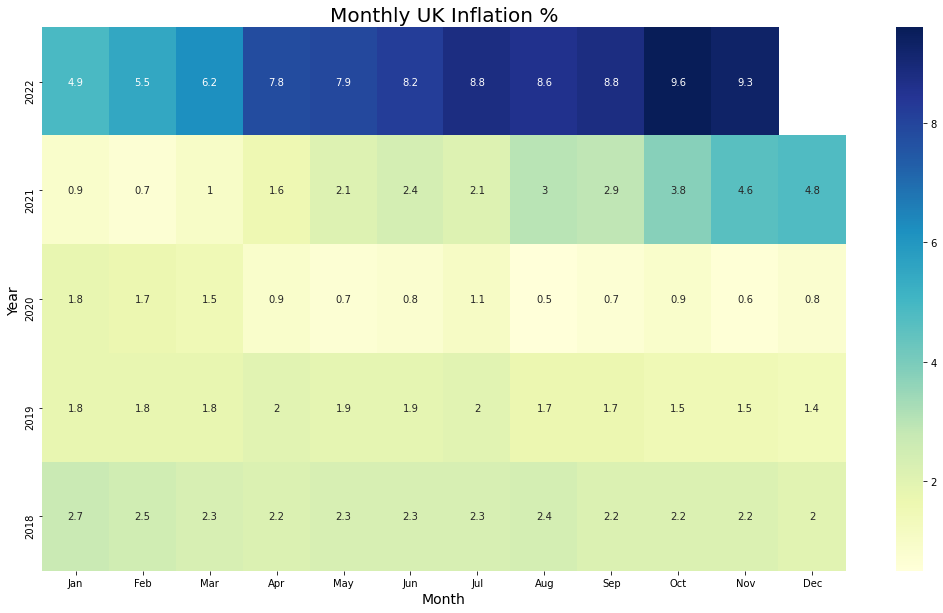

In [10]:
#plot in a heat map
g, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_wide[:5], square = False, annot = True, cmap ="YlGnBu" )
ax.set_title('Monthly UK Inflation %', fontsize = 20)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Year', fontsize = 14)

In [39]:
plt.savefig("../03 outputs/UK_inflation_monthly.png", bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

In [11]:
US_CPI_import = pd.read_html('https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/', header = 1, index_col = 0)[0]

In [12]:
US_CPI_import = pd.read_html('https://www.usinflationcalculator.com/inflation/historical-inflation-rates/', index_col =0)[0]
US_CPI_import

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
Year,,,,,,,,,,,,,
1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7


In [13]:
US_CPI_import_cols = list(US_CPI_import[:])
US_CPI_import_cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Ave']

In [14]:
for i in US_CPI_import_cols:
    US_CPI_import[i] = pd.to_numeric(US_CPI_import[i], errors = 'coerce')

In [15]:
US_CPI = US_CPI_import.sort_index(ascending = False)

In [16]:
US_CPI[:10]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
Year,,,,,,,,,,,,,
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
2017,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2,2.0,2.2,2.1,2.1
2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,1.3
2015,-0.1,0.0,-0.1,-0.2,0.0,0.1,0.2,0.2,0.0,0.2,0.5,0.7,0.1


Text(141.0, 0.5, 'Year')

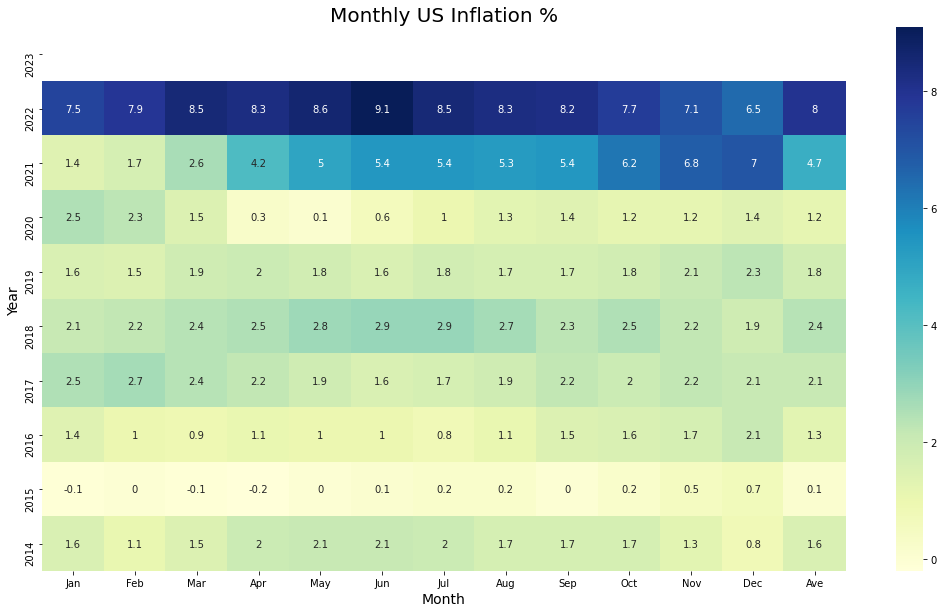

In [17]:
g1, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(US_CPI[:10], square = False, annot = True, cmap ="YlGnBu")
ax.set_title('Monthly US Inflation %', fontsize = 20)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Year', fontsize = 14)

In [40]:
plt.savefig("../03 outputs/US_inflation_monthly.png", bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>